In [ ]:
# (STEP 1) Count Phrase Occurances

## NEED: method to determine which phrases to keep track of

## METHOD: develop and create a frequency matrix with all of our articles
## and tracking the frequency of phrases

In [ ]:
## NOTE: Whe initializing CountVectorizer, ngram_range=(1, 2)
## and max_features = 20000 significantly reduces dense array size

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load articles
articles_df = pd.read_csv('10k_articles_formatted.csv')
articles = articles_df['content'].astype(str).apply(lambda x: x.lower().replace('period', '.'))

# Load phrases
phrases_df = pd.read_csv('Gensim_Python_Notebook_Results\\remaining_phrases.csv')
phrases = phrases_df['phrase'].tolist()

# Initialize CountVectorizer with adjustments
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=20000, min_df=2) 

# Fit the vectorizer to the articles and transform the data
frequency_matrix = vectorizer.fit_transform(articles)

# Get the feature names and filter for phrases, optimizing the process
feature_names = vectorizer.get_feature_names_out()
matched_phrases = [phrase for phrase in phrases if phrase in feature_names]

# Create a sparse DataFrame (if needed) or work directly with the sparse matrix
# For demonstration, creating a DataFrame with matched phrases only
matched_phrase_indices = [feature_names.tolist().index(phrase) for phrase in matched_phrases if phrase in feature_names]
frequency_df = pd.DataFrame(frequency_matrix[:, matched_phrase_indices].toarray(), columns=matched_phrases)

# Optional: Set newspaper names as the index
frequency_df.index = articles_df['name']

# Save to CSV
frequency_df.to_csv('test_freq_matrix_reduced.csv', index=False)

# Display the first few rows of the frequency matrix
print(frequency_df.head())

In [ ]:
## ORIGINAL CODE CHUNK ... trouble compiling on local system due to size in memory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load articles and phrases, create frequency matrix
# Load articles
articles_df = pd.read_csv('10k_articles_formatted.csv')
articles = articles_df['content'].astype(str).apply(lambda x: x.lower().replace('period', '.'))

# Load phrases
phrases_df = pd.read_csv('Gensim_Python_Notebook_Results\\remaining_phrases.csv')
phrases = phrases_df['phrase'].tolist()

# Initialize CountVectorizer with n-gram range
vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit the vectorizer to the articles and transform the data
frequency_matrix = vectorizer.fit_transform(articles)

# Get the feature names that match your phrases
matched_phrases = [phrase for phrase in phrases if phrase in vectorizer.get_feature_names_out()]

# Create a DataFrame with only the columns for your phrases
frequency_df = pd.DataFrame(frequency_matrix.toarray(), columns=vectorizer.get_feature_names_out())
frequency_df = frequency_df[matched_phrases]

# Optional: Set newspaper names as the index
frequency_df.index = articles_df['name']

# Save the frequency matrix to a CSV file
frequency_df.to_csv('frequency_matrix.csv', index=False)

# Display the first few rows of the frequency matrix
print(frequency_df.head())

In [9]:
# Step 2: Use Poisson Distribution for Analysis

## NOTE: 'Mean absolute difference between observed and expected frequencies: 0.09406645311366801'
## is considerably low and may be indicative of a signficant goodness of fit of the Poisson Distribution
## on the current dataset. We should include additional, relevant summary statistics to corroborate
## the goodness of fit.

# Load the frequency matrix from the CSV file
import numpy as np

frequency_df = pd.read_csv('test_freq_matrix_reduced.csv')

# Calculate lambda for each keyword as the mean occurrences across all articles
lambda_per_keyword = frequency_df.mean(axis=0)

# Assuming the number of articles and keywords might vary
num_articles, num_keywords = frequency_df.shape

# Use the calculated lambda values for simulating Poisson distributions
simulated_keyword_occurrences = np.random.poisson(lambda_per_keyword, (num_articles, num_keywords))

# Compare observed and expected frequencies
observed_frequencies = frequency_df.to_numpy()
expected_frequencies = simulated_keyword_occurrences

# Calculating differences
difference = np.abs(expected_frequencies - observed_frequencies)

print(f"Mean absolute difference between observed and expected frequencies: {np.mean(difference)}")

Mean absolute difference between observed and expected frequencies: 0.09406645311366801


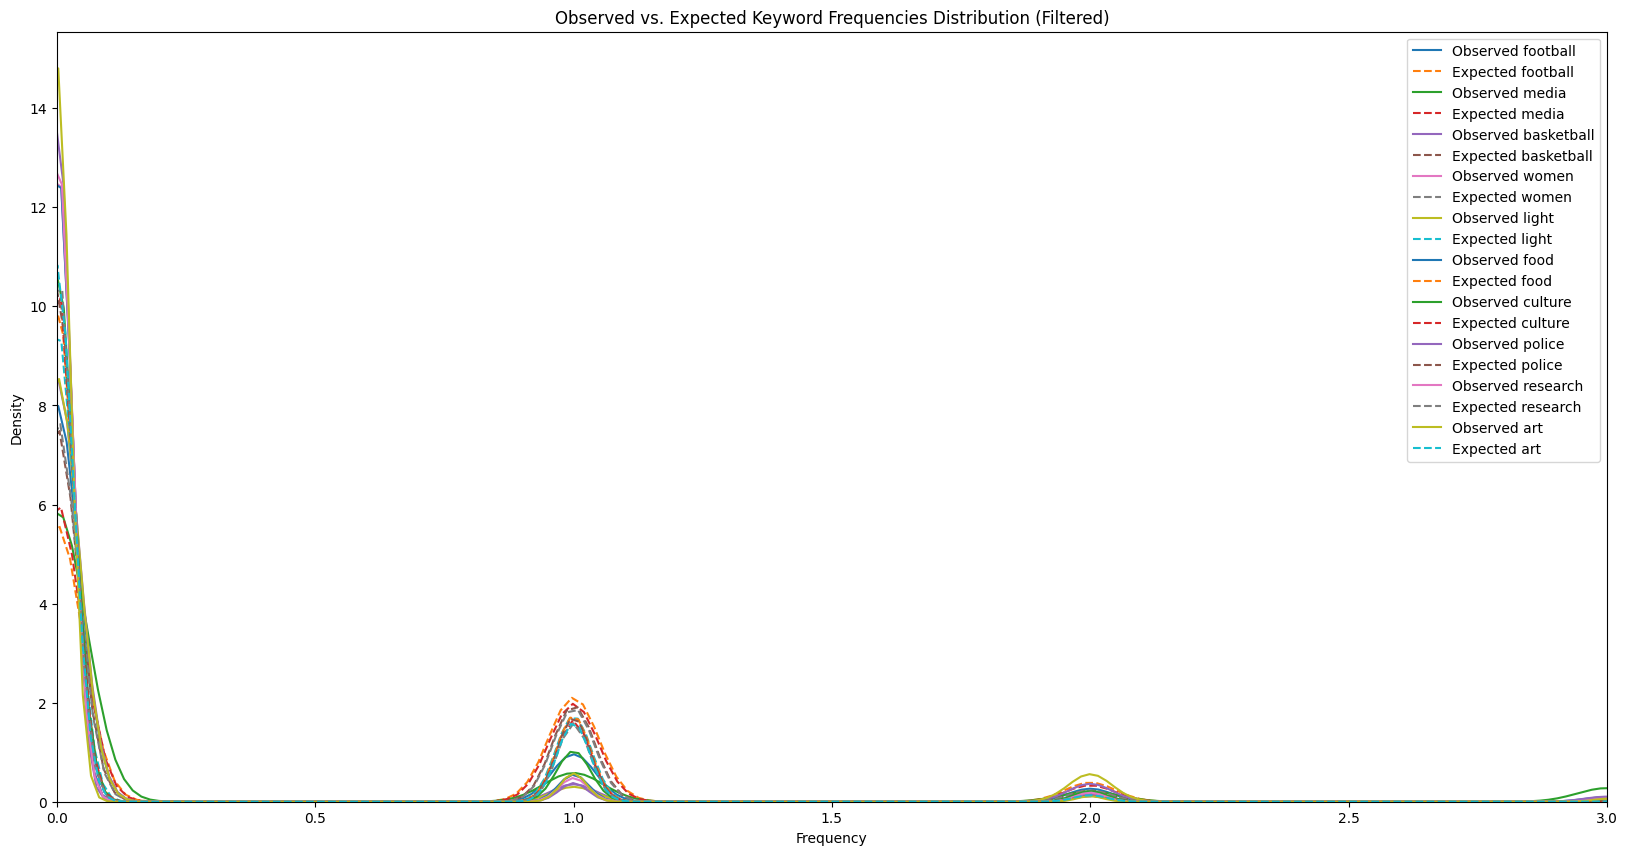

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming lambda_per_keyword and other necessary data have been defined earlier in your script

# Visualization of Frequency Data
# Choose a subset of keywords for visualization
keywords_to_visualize = lambda_per_keyword.sort_values(ascending=False).head(10).index

# Plotting Frequency Data
plt.figure(figsize=(20, 10))
for keyword in keywords_to_visualize:
    # Get column index for the keyword
    col_index = frequency_df.columns.get_loc(keyword)
    
    # Apply filter for observed frequencies to exclude counts > 15
    observed_filtered = observed_frequencies[:, col_index][observed_frequencies[:, col_index] <= 3]
    
    # Apply the same filter for expected frequencies (if applicable, or adjust as needed)
    expected_filtered = expected_frequencies[:, col_index][observed_frequencies[:, col_index] <= 3]
    
    # Plotting the filtered distributions
    sns.kdeplot(observed_filtered, label=f"Observed {keyword}", bw_adjust=0.5)
    sns.kdeplot(expected_filtered, label=f"Expected {keyword}", linestyle="--", bw_adjust=0.5)

plt.legend()
plt.title('Observed vs. Expected Keyword Frequencies Distribution (Filtered)')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.xlim(0, 3)  # Set x-axis limit to reflect the filtering
plt.show()

In [ ]:
# (STEP 3) SVD application and (STEP 4) Modifying the SVD to address
# shortcomings relating to the specific nature of this project

In [ ]:
# (STEP 5) Data tranformation using the Poisson Likelihood function
# (the log of) to best explain observed phrase counts

## PURPOSE: Adjusts the model to enable the predicted phrase counts to closely
## mirror the actual phrase counts

In [ ]:
# (STEP 6) -> Gradient Descent for data optimization
# (STEP 7) -> Getting rid of negative counts